In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import datetime

import random

In [2]:
house2 = pd.read_csv('/Users/tchouar/code_stage/all_data/new_data/data/House2.csv', parse_dates=['time'], index_col='unix')
print(house2.shape)


(4676401, 12)


In [3]:
house2.columns

Index(['time', 'aggregate', 'washing machine', 'fridge freezer', 'microwave',
       'dishwasher', 'toaster', 'fan', 'television', 'audio system', 'kettle',
       'agg_4p'],
      dtype='object')

In [4]:
house2 = house2[['time', 'washing machine']]

In [5]:
fridge_data = house2['washing machine'].values.reshape(-1, 1)

#  application de K-means
kmeans = KMeans(n_clusters=3, random_state=10).fit(fridge_data)
labels = kmeans.labels_
house2['État'] = labels


# Étape 4: Visualisation des résultats pour déterminer les états ON et OFF
'''
plt.figure(figsize=(12, 6))
#plt.scatter(range(len(fridge_data)), fridge_data, c=labels)
plt.scatter(house2.index, fridge_data, c=labels)
plt.title('Segmentation of washing machine ON and OFF cycles')
plt.xlabel('Index')
plt.ylabel('Actif power "washing machine" (W)')
plt.show()
'''

print("Centres de clusters:", kmeans.cluster_centers_)

Centres de clusters: [[5.59279577e-01]
 [2.05187043e+03]
 [1.45624779e+02]]


In [8]:
house2[house2['État'] == 2]

,time,washing machine,État
unix,,,
1395362912,2014-03-21 00:48:32,160.0,2
1395362920,2014-03-21 00:48:40,160.0,2
1395494960,2014-03-22 13:29:20,106.0,2
1395495184,2014-03-22 13:33:04,98.0,2
1395495208,2014-03-22 13:33:28,107.0,2
...,...,...,...
1432291944,2015-05-22 10:52:24,234.0,2
1432291952,2015-05-22 10:52:32,239.0,2
1432291960,2015-05-22 10:52:40,239.0,2


In [9]:
# identifier les transitions de cycle 
house2['État 2'] = house2['État'].shift(1) # ver le bas 

In [10]:
house2.head(1)

,time,washing machine,État,État 2
unix,,,,
1395360000,2014-03-21,0.0,0,NaN


In [11]:
house2['État 2'] = house2['État 2'].fillna(0) ###

In [12]:
house2.head(1)

,time,washing machine,État,État 2
unix,,,,
1395360000,2014-03-21,0.0,0,0.0


In [11]:
normal_consumption_transition_matrix = pd.crosstab(house2['État'], house2['État 2'])
normal_consumption_transition_matrix

État 2,0.0,1.0,2.0
État,,,
0,4535997,255,20680
1,281,29163,178
2,20654,204,68989


In [13]:
transitions = house2[house2['État'] != house2['État 2']] # a modifier 

transitions['Start_Index'] = transitions['time']


/var/folders/87/c96z3lj528s0yqr3y568z9qr0000gn/T/ipykernel_21154/1858438503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transitions['Start_Index'] = transitions['time']


In [15]:
transitions.head(3)

,time,washing machine,État,État 2,Start_Index
unix,,,,,
1395362912,2014-03-21 00:48:32,160.0,2,0.0,2014-03-21 00:48:32
1395362928,2014-03-21 00:48:48,0.0,0,2.0,2014-03-21 00:48:48
1395494960,2014-03-22 13:29:20,106.0,2,0.0,2014-03-22 13:29:20


In [16]:
transitions['End_Index'] = transitions['time'].shift(-1) # décale ver le haut, la fin de chaque cycle 

/var/folders/87/c96z3lj528s0yqr3y568z9qr0000gn/T/ipykernel_21154/2681079388.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transitions['End_Index'] = transitions['time'].shift(-1) # décale ver le haut, la fin de chaque cycle


In [17]:
transitions[transitions['État'] == 1] # c = 0 OFF, c = 1 heating phase, c = .....

,time,washing machine,État,État 2,Start_Index,End_Index
unix,,,,,,
1395495536,2014-03-22 13:38:56,2039.0,1,0.0,2014-03-22 13:38:56,2014-03-22 13:56:00
1395595112,2014-03-23 17:18:32,2112.0,1,0.0,2014-03-23 17:18:32,2014-03-23 17:18:56
1395595152,2014-03-23 17:19:12,2112.0,1,0.0,2014-03-23 17:19:12,2014-03-23 17:21:12
1395595288,2014-03-23 17:21:28,2087.0,1,0.0,2014-03-23 17:21:28,2014-03-23 17:36:00
1395846944,2014-03-26 15:15:44,2073.0,1,0.0,2014-03-26 15:15:44,2014-03-26 15:16:56
...,...,...,...,...,...,...
1431160944,2015-05-09 08:42:24,2033.0,1,2.0,2015-05-09 08:42:24,2015-05-09 08:43:44
1431161032,2015-05-09 08:43:52,1641.0,1,2.0,2015-05-09 08:43:52,2015-05-09 08:56:00
1432110664,2015-05-20 08:31:04,2053.0,1,2.0,2015-05-20 08:31:04,2015-05-20 08:45:12


### anomaly elongated2  

In [18]:
transitions.head(2)

,time,washing machine,État,État 2,Start_Index,End_Index
unix,,,,,,
1395362912,2014-03-21 00:48:32,160.0,2,0.0,2014-03-21 00:48:32,2014-03-21 00:48:48
1395362928,2014-03-21 00:48:48,0.0,0,2.0,2014-03-21 00:48:48,2014-03-22 13:29:20


In [19]:
liste_duration = []
for index, row in transitions.iterrows():
    if pd.isnull(row['End_Index']):
        liste_duration.append(None)
        continue
    start_idx = int(row['Start_Index'].timestamp())
    end_indx = int(row['End_Index'].timestamp())
    duration = (end_indx - start_idx) / 8
    liste_duration.append(duration)
transitions['Duration'] = liste_duration

/var/folders/87/c96z3lj528s0yqr3y568z9qr0000gn/T/ipykernel_21154/21608443.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transitions['Duration'] = liste_duration


In [20]:
transitions.head()

,time,washing machine,État,État 2,Start_Index,End_Index,Duration
unix,,,,,,,
1395362912,2014-03-21 00:48:32,160.0,2,0.0,2014-03-21 00:48:32,2014-03-21 00:48:48,2.0
1395362928,2014-03-21 00:48:48,0.0,0,2.0,2014-03-21 00:48:48,2014-03-22 13:29:20,16504.0
1395494960,2014-03-22 13:29:20,106.0,2,0.0,2014-03-22 13:29:20,2014-03-22 13:29:28,1.0
1395494968,2014-03-22 13:29:28,6.0,0,2.0,2014-03-22 13:29:28,2014-03-22 13:33:04,27.0
1395495184,2014-03-22 13:33:04,98.0,2,0.0,2014-03-22 13:33:04,2014-03-22 13:33:12,1.0


In [22]:
heating_phase = transitions[transitions['État'] == 1]
anomalies = random.sample([i for i in heating_phase.index if (i % 8 == 0) and (heating_phase.at[i, 'Duration'] >= 8)], 6) # si non je peux pas avoir 8 valeurs

In [30]:
house2.head(2)

,time,washing machine,État,État 2
unix,,,,
1395360000,2014-03-21 00:00:00,0.0,0,0.0
1395360008,2014-03-21 00:00:08,0.0,0,0.0


In [23]:
anomalies

[1399145448, 1418986792, 1416228224, 1399624632, 1431161032, 1412669744]

In [33]:
house2[['time','washing machine' 'État']]

,time,État
unix,,
1395360000,2014-03-21 00:00:00,0
1395360008,2014-03-21 00:00:08,0
1395360016,2014-03-21 00:00:16,0
1395360024,2014-03-21 00:00:24,0
1395360032,2014-03-21 00:00:32,0
...,...,...
1432771168,2015-05-27 23:59:28,0
1432771176,2015-05-27 23:59:36,0
1432771184,2015-05-27 23:59:44,0


In [24]:
def process_washing_machine_data(data, transitions, anomalies):
    # reshape data
    cycle_stats = []
 



    df_anomaly = data[['time','washing machine', 'État']].copy()
    df_anomaly['anomaly'] = 0

    for index in anomalies:
        if pd.isnull(transitions['End_Index'][index]):
            continue

        duration = transitions['Duration'][index]
        start_idx = index
        end_indx = int(transitions['End_Index'][index].timestamp()) - 8
        previous_patern = list(data.loc[start_idx:end_indx, 'washing machine'])

        HeatingValues_indx = random.sample([i for i in range(start_idx, end_indx) if i % 8 == 0], 8) # ici j'ai pris 8 index aléatoire pour ...
        HeatingValues = [data.loc[data.index == unix_value, 'washing machine'].values[0] for unix_value in HeatingValues_indx] # 

        MeanFourMax = np.mean(HeatingValues)
        extension_percentage = random.uniform(0.1, 0.2)
        # Etendre la duré 
        extension_duration = int(duration * extension_percentage)

        # Ajouter liste consomation
        val_conso2_add = [random.randint(int(MeanFourMax), int(max(HeatingValues))) for _ in range(extension_duration)]
        patern = previous_patern + val_conso2_add

        extension_duration = extension_duration * 8 # pour ajouter a unix values
        df_anomaly.loc[start_idx:end_indx + extension_duration, 'washing machine'] = patern
        df_anomaly.loc[start_idx:end_indx + extension_duration, 'anomaly'] = 1
        df_anomaly.loc[start_idx:end_indx + extension_duration, 'État']
        cycle_stats.append({
            'start_index': start_idx,
            'end_index': end_indx + extension_duration,
            'duré' : len(patern)
            
        })

   
    cycle_stats = pd.DataFrame(cycle_stats)
    return df_anomaly, cycle_stats




In [25]:
df_elongated_anomaly , cycle_stats_anomaly =  process_washing_machine_data(data=house2, transitions=transitions, anomalies=anomalies)

In [26]:
cycle_stats_anomaly

,start_index,end_index,duré
0,1399145448,1399145968,66
1,1418986792,1418987712,116
2,1416228224,1416229176,120
3,1399624632,1399625280,82
4,1431161032,1431161872,106
5,1412669744,1412670760,128


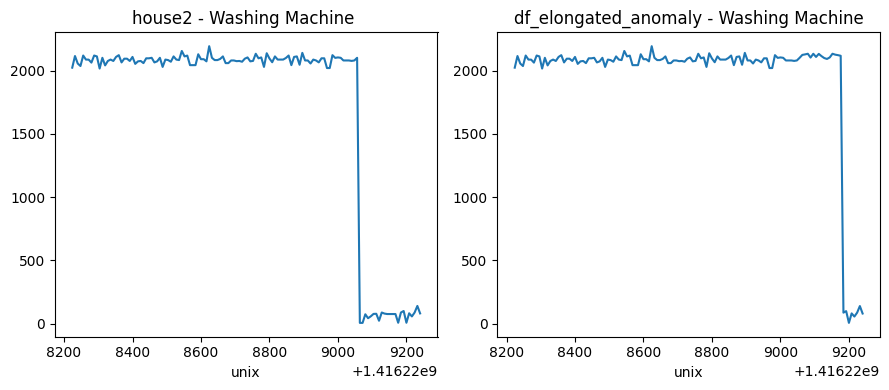

In [36]:
import matplotlib.pyplot as plt

# Creating a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

# Plotting the first dataframe
df_elongated_anomaly.loc[1416228224:1416229176 + 64, 'washing machine'].plot(ax=ax2)
ax1.set_title('house2 - Washing Machine ')

# Plotting the second dataframe
house2.loc[1416228224:1416229176 + 64, 'washing machine'].plot(ax=ax1)
ax2.set_title('df_elongated_anomaly - Washing Machine')

# Display the plots
plt.tight_layout()
plt.show()


In [41]:
df_elongated_anomaly.to_csv('/Users/tchouar/code_stage/models/Data/Washing_machine_H2_with_anomaly.csv', index='False')
cycle_stats_anomaly.to_csv('/Users/tchouar/code_stage/models/Data/Washing_machine_H2_stat.csv', index='False')